# E-commerce Customer Churn Analysis and Prediction

## Zahra Rizkita Putri

# Outline

- Business Understanding
- Data Cleaning
- Exploratory Data Analysis
- Feature Engineering
- Modelling
- Hyperparameter Tuning
- Post Modelling
    1. Final Model Evaluation
    2. Feature Importances
    3. Confusion Matrix
    4. Implementation for Business
- Conclusion and Recommendation

# Understanding the Business

### Background

E-commerce is a type of business that operates online, allowing customers to buy and sell products and services without the need for face-to-face interaction with sellers. In this industry, it is crucial to understand and address customer churn.

Customer churn refers to the rate at which customers leave a particular group or company within a specific timeframe. This concept can be applied to various situations, such as employees leaving a company or customers canceling their subscriptions. In e-commerce, a high churn rate can be detrimental because acquiring and retaining customers is essential for business growth. Therefore, many e-commerce companies analyze customer churn through datasets to better understand and tackle this issue.

Customer churn datasets typically contain information about customers' purchase history, including the number of purchases, the most recent purchase, and the types of products bought. This data is used to analyze churn rates and devise strategies to reduce them. For example, businesses can identify customer segments that are most prone to churn and develop retention strategies accordingly.

Customer churn has a significant impact on key business metrics in e-commerce, including customer retention rate, customer satisfaction rate, and marketing success. However, from a financial perspective, the metrics most affected by customer churn are the success rate of marketing efforts and the ability to retain customers.

### Problem Statement

Loyal customers who churn can pose a loss for the company if not addressed. Therefore, it is essential for the company to retain the engagement of loyal customers on the e-commerce platform. One way to achieve this is by offering promotions. However, the cost and resources expended may be less effective if promotions are carried out without a strategic approach.In the e-commerce industry, it is crucial to accurately predict and address customer churn in order to retain customers and minimize the negative impact on business revenue and profitability.

###  Objectives

The company can take preventive measures by predicting customer churn. By identifying customers who are likely to churn, marketing strategies can be targeted more effectively. This can reduce marketing costs and increase profits by retaining loyal customers. Additionally, understanding the factors that influence customer churn can provide valuable insights for making marketing strategy decisions.

### Analytic Approach

This project aims to explore how an e-commerce company can predict customer churn using a classification model that analyzes customer patterns and predicts whether they are likely to churn or remain loyal.

### Metrics Evaluation

|       | N-Pred| P-Pred |
| --- | --- | --- |
| **N-Act**     | TN | FN |
| **P-Act**      | FP | TP |

Target:   
- 0   : Customer is loyal (not going to churn in certain period of time)
- 1   : Customer will churn

1. FP : False Positive (Customer predicted to churn but does not churn within the specified period)
2. FN: False Negative (Customer predicted not to churn but churns within the specified period)

False Negative rate should be minimized or Recall should be optimized.

# Data Cleaning

### Load Library

In [253]:
# Library
import numpy as np 
import pandas as pd 

# Library for visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Library for train test split
from sklearn.model_selection import train_test_split

# Library for impute missing values
from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer 


# Library for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# Library for encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# Library for column transformer & pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Library for cross validation
from sklearn.model_selection import cross_val_score

# Library for algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

# Library for metric evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Load the Data

In [254]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


### Features


| Attribute | Data Type| Description | Variable Type  |
| --- | --- | --- | --- |
| Tenure | Float | Tenure of customer in ecommerce company | Quant. Continuous |
| WarehouseToHome | Float | Distance in between warehouse to home of customer | Quant. Continuous |
| NumberOfDeviceRegistered | Integer | Total number of devices is registered on particular customer | Quant. Discrete |
| PreferedOrderCat | Text | Preferred order category of customer in last month | Qual. (Nominal) |
| SatisfactionScore | Integer | Satisfactory score of customer on service | Qual. (Ordinal) |
| MaritalStatus | Text | Marital status of customer | Qual. (Nominal) |
| NumberOfAddress | Integer | Total number of added added on particular customer | Quant. Discrete | 
| Complain | Integer | Any complaint has been raised in last month | Qual. (Nominal)|
| DaySinceLastOrder | Float | Day Since last order by customer | Quant. Continuous |
| CashbackAmount | Float | Average cashback in last month | Quant. Continuous |
| Churn | Integer | 0 - Not Churn, 1 - Churn| Qual. (Nominal) | 

### Description of feature 

1. In an e-commerce churn dataset, the "Tenure" column represents the duration of time, assumed to indicate the length of time a customer has been with the company. This information can be used to understand the relationship between customer familiarity and their likelihood to churn, or discontinue using the service. For example, customers who have been using the platform for a long time may be less likely to churn, while new customers may be more inclined to try different services or churn if they are dissatisfied.

2. "Warehouse to home" refers to the distance between the product storage warehouse and the customer's home. It indicates how far the product needs to be delivered from the warehouse to the customer's location. The closer the distance between the warehouse and the customer's home, the faster the customer can receive the product. Therefore, this distance may impact customer satisfaction and their likelihood to stay as customers.

3. "Number of Device Registered" represents the count of devices registered under a customer's account. It indicates how many devices the customer uses to engage in transactions on the e-commerce platform. For example, if a customer has 2 devices registered under their account, the value in this column would be 2. There are several ways to analyze the correlation between the number of registered devices and the customer churn rate. For instance, if a customer has more registered devices, they may have higher engagement with the e-commerce store and are likely to churn less. Conversely, if a customer has only one registered device, they may have less interaction with the e-commerce store and are more likely to churn. Therefore, it is important to observe the correlation between the "Number of Device Registered" and the customer churn rate to understand how this factor influences customer churn.

4. The "Preferred Order Category" column indicates the most frequently ordered category by customers. There could be various categories, such as electronics, clothing, cosmetics, and so on. In this case, the correlation between the "Preferred Order Category" and churn can be analyzed by examining how often customers order products in that category and how frequently they churn. If customers frequently order products in a specific category and churn less often, it can be said that their ordering preference has a negative correlation with churn. Conversely, if customers frequently churn after ordering products in a particular category, it can be said that their ordering preference has a positive correlation with churn.

5. "Satisfaction Score" is a rating that measures the level of customer satisfaction with the services received from an online store. This score is usually provided after a customer completes a transaction or uses services from the store. Customer satisfaction is crucial as it can influence their decision to continue shopping at the store or decide to switch to another store. Therefore, satisfaction scores are essential in predicting the customer churn rate, which represents the rate at which customers decide to stop shopping at the store. If the satisfaction score is low, the likelihood of churn is higher. Conversely, if the satisfaction score is high, the likelihood of churn is lower.

6. In the marital status column, there are three categories: "single," "married," and "divorced." The correlation between each category and the churn rate can be found through data analysis. In this analysis, I will compare the churn rates among single, married, and divorced customers to determine if there is a significant relationship between marital status and churn rate. However, it is important to note that correlation does not always indicate causation, so other factors that may affect the churn rate should also be considered.

7. The "Number of Address" column records the number of addresses owned by e-commerce customers. The correlation between the "Number of Address" and churn can indicate whether customers with multiple addresses are more stable or less likely to churn. If customers have multiple addresses, it may indicate that they have higher needs and are less likely to leave the e-commerce service. However, statistical testing is needed to ensure significant correlation. Data transformation into categorical variables can be performed to facilitate analysis and minimize scale differences that may affect the results. In this case, the number of addresses may have many different values that make it difficult to analyze. Therefore, creating categories such as "one address," "two addresses," "three addresses," etc., makes the data easier to analyze.

8. The "Complain" column indicates whether customers have made a complaint within the last month. A value of "1" indicates that the customer has made a complaint during that period, while a value of "0" indicates that the customer has not made a complaint. The correlation between the "Complain" column and churn can be analyzed to determine if customers who make complaints tend to unsubscribe (churn) or not. If it is found that customers who make complaints have a higher churn rate compared to those who do not make complaints, then the "Complain" column can be considered a risk factor influencing churn.

9. "Cashback Amount" is a column that indicates the average amount of cashback earned by customers in the last month. In this case, cashback refers to promotional programs provided by e-commerce companies to incentivize customers to continue shopping. The correlation between the Cashback Amount and churn can be analyzed to understand if there is a relationship between the amount of cashback earned by customers and their decision to stay or churn as customers.

10. The "Days Since Last Order" column indicates the duration since the customer's last order. In this context, churn is typically defined as customers not placing an order within a certain time frame. Therefore, the "Days Since Last Order" column is crucial in defining churn as it helps determine whether customers are still active or have become inactive. If the "Days Since Last Order" column has a strong correlation with churn, it can be said that customers who place orders less frequently tend to have a higher churn rate. Therefore, analyzing the correlation between this column and churn provides valuable insights into the factors influencing customer churn.

### Check data

In [255]:
# Check data type per column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [256]:
# Check all columns name

df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [257]:
# Check data distribution

df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [258]:
# Check unique value per column

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].unique())])

dataDesc = pd.DataFrame(columns=['data features', 'data type', 'null', 'null percentage', 'unique', 'unique value'],
                     data=listItem)
dataDesc

,data features,data type,null,null percentage,unique,unique value
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Several observations can be made:

1. The dataset consists of 3941 rows and 11 columns.
2. Numeric data includes quantitative variables such as Tenure, Warehouse to Home, Number of Device, Number of Address, Day Since Last Order, and Cashback Amount. Numeric data that indicate "yes" or "no" or have a qualitative nature are Complain and Churn. Satisfaction Score is a qualitative variable with an ordinal scale.
3. There are two categorical variables, namely Preferred Order Cat and Marital.

### Drop Duplicated Data

In [259]:
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [260]:
(len(df[df.duplicated()])/len(df))*100

17.026135498604415

In [261]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [262]:
df.duplicated().sum()

0

### Check Missing Value

In [ ]:
# Check missing value per column

df.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [ ]:
#Count total value of missing value
print(f'The number of missing values: {df.isnull().sum().sum()}')

#Count total rows of missing value
print(f'The number of rows with missing values: {df[df.isnull().any(axis=1)].shape[0]}')

The number of missing values: 476
The number of rows with missing values: 476


### Handling Missing Value

(array([1272.,  751.,  495.,  336.,  222.,   30.,    0.,    0.,    2.,
           2.]),
 array([ 0. ,  6.1, 12.2, 18.3, 24.4, 30.5, 36.6, 42.7, 48.8, 54.9, 61. ]),
 <BarContainer object of 10 artists>)

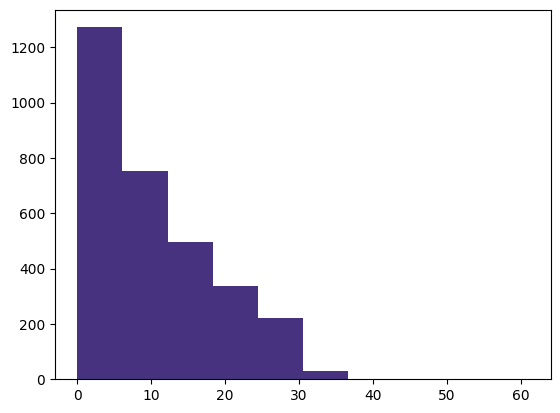

In [ ]:
# Check distribution of tenure without missing value

plt.hist(df['Tenure'].dropna())

There is a positively skewed distribution in the Tenure column data. From this distribution, it can be inferred that filling the data with the median is more suitable than the mean.

<Axes: >

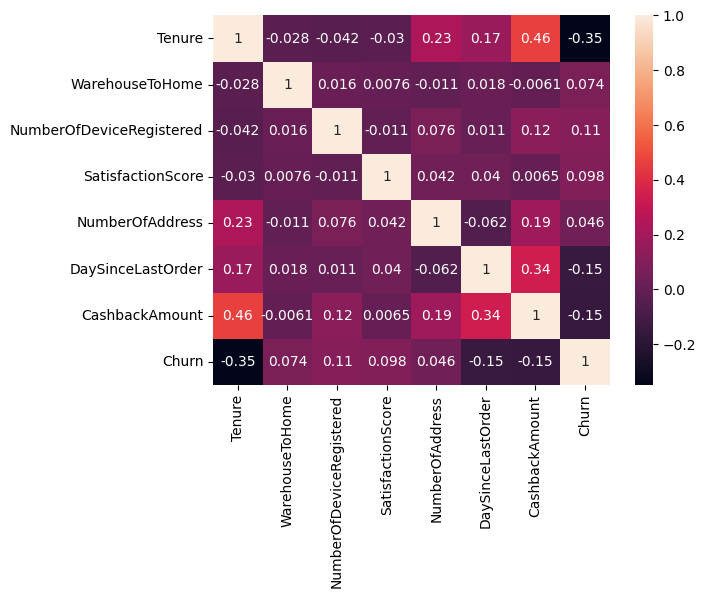

In [ ]:
# Heatmap of numerical columns

corr = df[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress','DaySinceLastOrder', 'CashbackAmount',
       'Churn']].corr()

sns.heatmap(corr, annot=True)

In [ ]:
# Filling Tenure Value with median

median = df['Tenure'].median()
df['Tenure'].fillna(median, inplace=True)

In [ ]:
df.isnull().sum()

Tenure                        0
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Text(0, 0.5, 'Frequency')

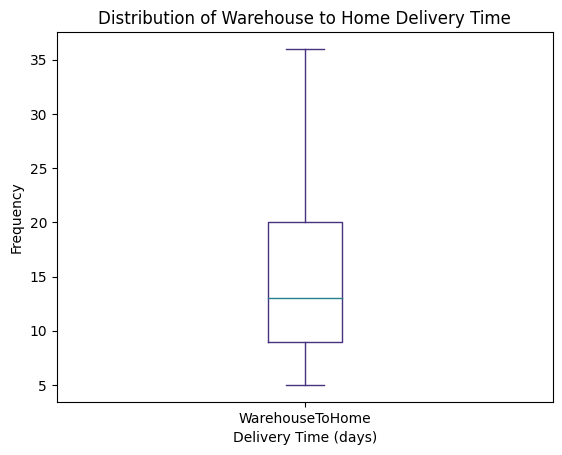

In [ ]:
# Check Warehouse to Home

df['WarehouseToHome'].plot.box(showfliers=False)
plt.title("Distribution of Warehouse to Home Delivery Time")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Frequency")

A normally distributed data will have a box plot that is symmetric with the median as the central point and a relatively even distribution of data. However, the visualization above indicates the presence of positive skewness in the data.

In [ ]:
# Filling WarehouseToHome with median

median = df['WarehouseToHome'].median()
df['WarehouseToHome'].fillna(median, inplace=True)

In [ ]:
df.isnull().sum()

Tenure                        0
WarehouseToHome               0
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

<Axes: xlabel='DaySinceLastOrder', ylabel='Count'>

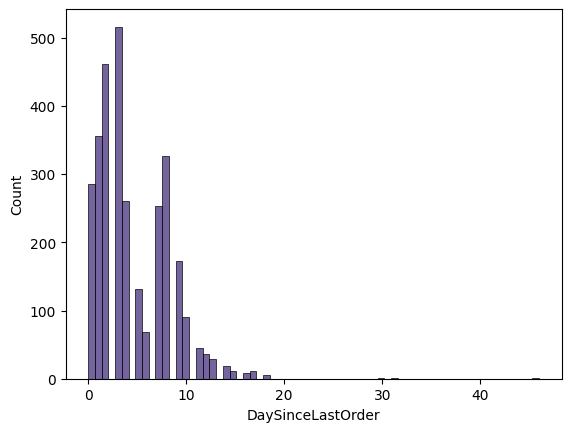

In [ ]:
# Check DaySinceLastOrder distribution

sns.histplot(df['DaySinceLastOrder'])

The data in the "Day Since Last Order" column also does not exhibit a normal distribution, indicating that using the median to fill in missing values would be appropriate.

In [ ]:
# Filling DaySinceLastOrder with median

median = df['DaySinceLastOrder'].median()
df['DaySinceLastOrder'].fillna(median, inplace=True)

In [ ]:
df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

All missing values in column Tenure, WarehouseToHome, and DaySinceLastOrder has been handled with proper treatment so there is no more missing value present in the data

## Check Outliers

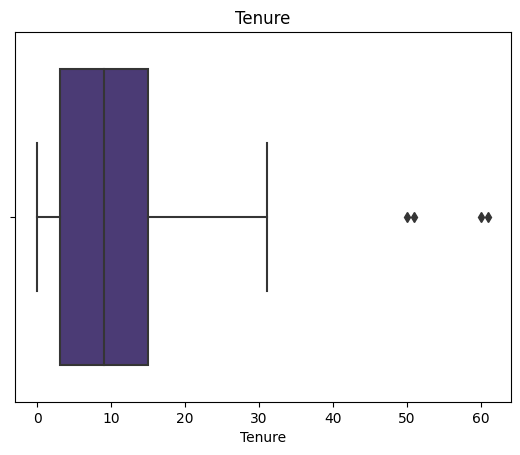

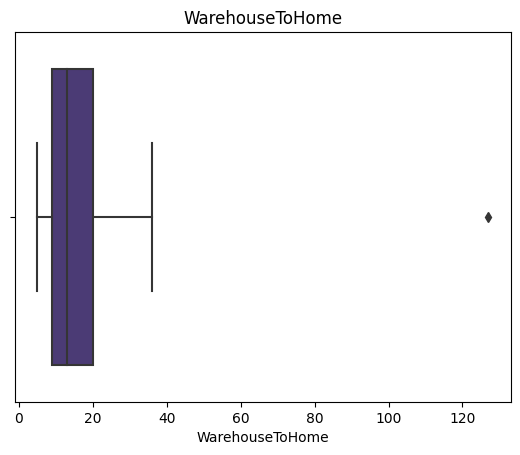

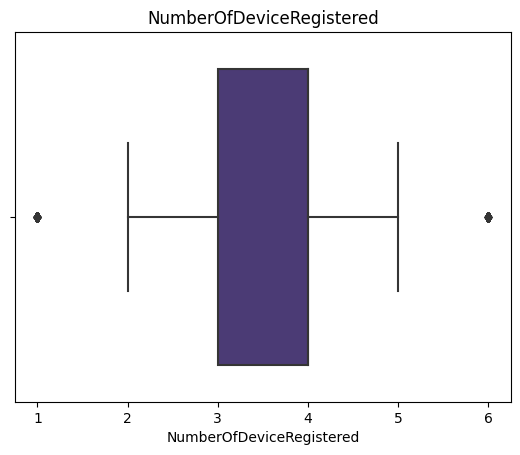

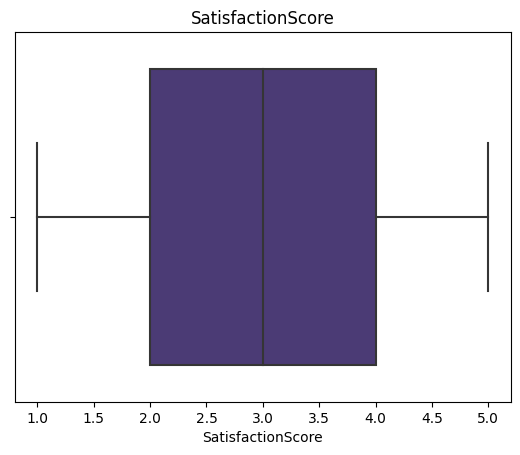

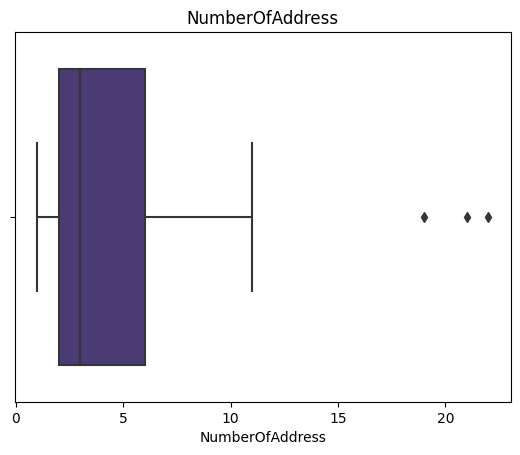

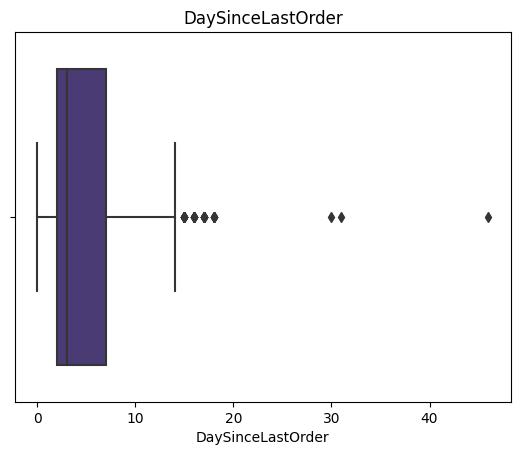

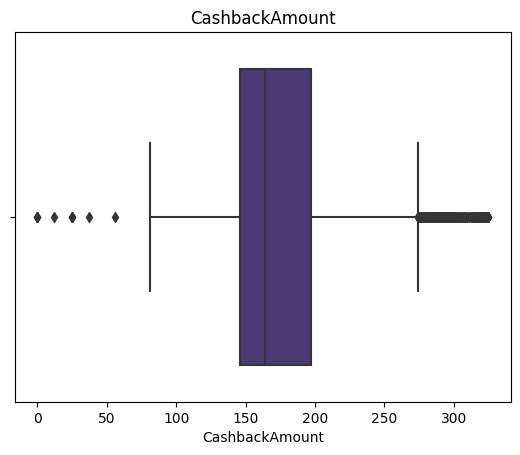

In [ ]:
numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [ ]:
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    return outliers
outliers = detect_outliers(df)
for col, count in outliers.items():
    print(f"Column: {col}, Outliers: {count}")

Column: Tenure, Outliers: 4
Column: WarehouseToHome, Outliers: 1
Column: NumberOfDeviceRegistered, Outliers: 226
Column: SatisfactionScore, Outliers: 0
Column: NumberOfAddress, Outliers: 3
Column: Complain, Outliers: 0
Column: DaySinceLastOrder, Outliers: 40
Column: CashbackAmount, Outliers: 253
Column: Churn, Outliers: 534


In the findings above, we can identify that there is a significant number of outliers in the columns "Number of Device" and "Cashback Amount" (excluding "Churn" as it is the dependent variable and only contains 2 unique values). However, in the case of the "Number of Device" and "Number of Address" columns, we cannot assume outliers based on the definition of outliers because these columns represent discrete numerical data, not continuous data.

In [ ]:
# The outliers in the "Cashback Amount" column have an equal proportion of churn and non-churn cases compared to the overall data.

cashback_amount = df['CashbackAmount']
Q1 = np.percentile(cashback_amount, 25)
Q3 = np.percentile(cashback_amount, 75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
outlier_indexes = cashback_amount[(cashback_amount > outlier_threshold)].index
churned_outliers = df.loc[outlier_indexes, 'Churn']
churn_ratio_outliers = churned_outliers.mean()
churn_ratio_outliers

0.045081967213114756

In [ ]:
df['Churn'].value_counts()

Churn
0    2736
1     534
Name: count, dtype: int64

In [ ]:
df['Churn'].value_counts()/len(df)

Churn
0    0.836697
1    0.163303
Name: count, dtype: float64

Due to the disparity in proportions between churn and non-churn cases within the outlier data of the "Cashback Amount" column, it is not feasible to remove or ignore these data points. Taking such action would disrupt the balance of the training dataset, which could adversely affect the machine learning model's performance. Therefore, no specific treatment will be applied to the outliers in order to preserve the integrity of the data and maintain the original proportion of churn and non-churn cases for training.

# Exploratory Data Analysis

## Customer Churn

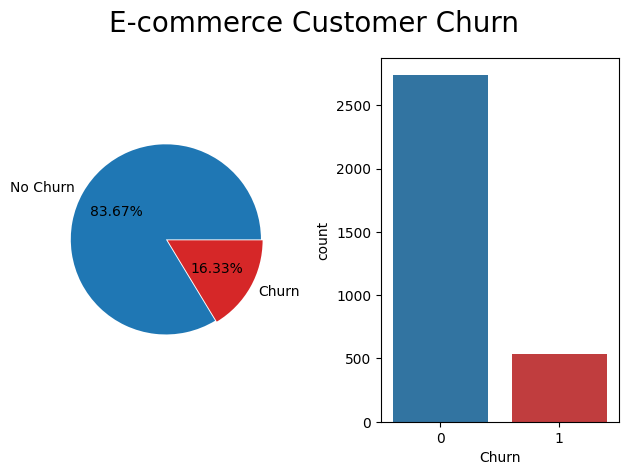

In [ ]:
# Check the distribution of the target

plt.figure().suptitle('E-commerce Customer Churn', fontsize=20)
plt.subplot(1,2,1)
plt.pie(df['Churn'].value_counts(), labels=['No Churn','Churn'], colors= ['tab:blue','tab:red'],autopct='%.2f%%',explode=(0.01,0.01))
plt.subplot(1,2,2)
sns.countplot(data=df, x='Churn',palette=['tab:blue',"tab:red"])
sns.color_palette('pastel')
plt.tight_layout()
plt.show()  

Based on the provided data, it is evident that the dataset exhibits class imbalance as there is a significant disparity in the proportions of the non-churn class (83.67%) and the churn class (16.33%). This imbalance can have detrimental effects on the performance of the machine learning model, particularly when it comes to accurately predicting the minority or churn class. To address this issue, the SMOTE (Synthetic Minority Oversampling Technique) resampling method will be employed, which involves generating synthetic instances of the minority class during the modeling process. Furthermore, the subsequent analysis will focus on assessing the impact of individual variables on customer churn.

## Numerical Variable

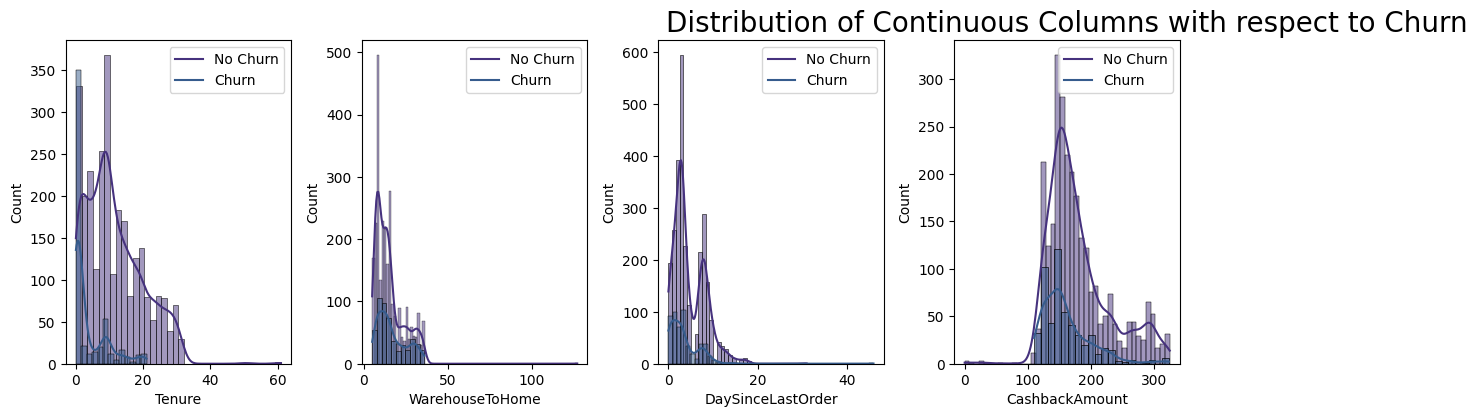

In [ ]:
continuous = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
a = 1
plt.figure(figsize=(12, 15))
sns.set_palette('viridis')
for i in continuous :
    plt.subplot(4, 4, a)
    sns.histplot(x=df[df['Churn'] == 0][i], kde=True)
    sns.histplot(x=df[df['Churn'] == 1][i], kde=True)
    plt.legend(labels=['No Churn', 'Churn'])
    plt.tight_layout()
    a += 1
plt.title('Distribution of Continuous Columns with respect to Churn', fontsize=20)
plt.show()

In the above distribution graphs with respect to churn, it can be observed that the proportion of non-churn cases is indeed larger than churn cases, leading to several insights, including:

1. Tenure represents the duration of e-commerce platform usage in months since the customer's registration. It is evident that customers with shorter tenure are more likely to churn. 

2. WarehouseToHome represents the distance between the warehouse and the customer's home. The churned customer data is distributed almost evenly across different distance ranges suggesting that as the distance between the warehouse and the customer's home increases, there is a possibility of churn.

3. DaySinceLastOrder for churned and non-churned customers shows a similar distribution. Further analysis will be conducted to examine the correlation between the "DaySinceLastOrder" data and churn.

4. CashbackAmount has the highest churn among customers around 150. Further analysis will be conducted to investigate the contributing factors.

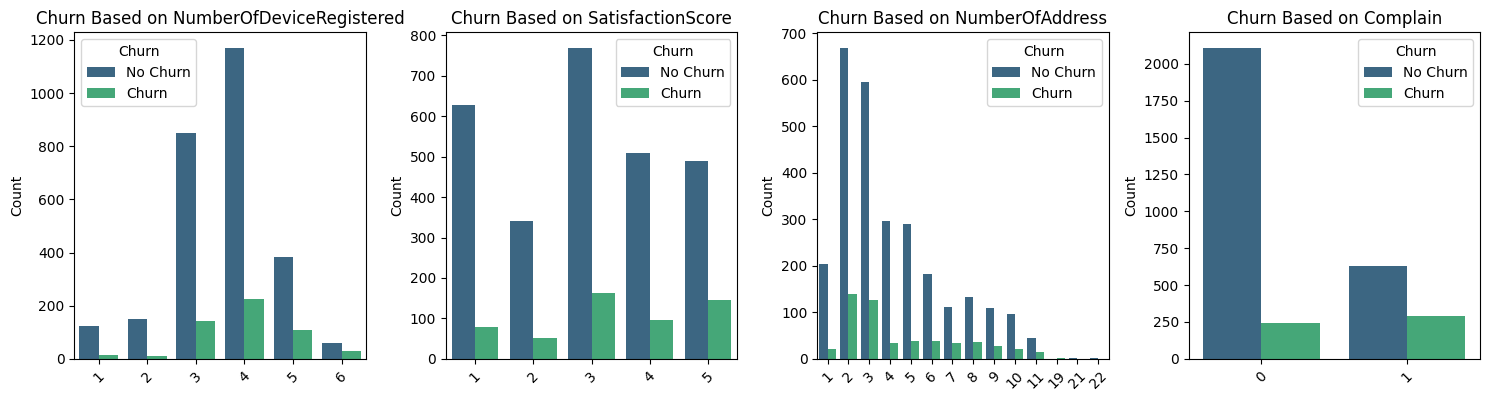

In [ ]:
columns = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
b = 1
plt.figure(figsize=(15, 15))

for i in columns:
    plt.subplot(4, 4, b)
    sns.countplot(x=i, hue='Churn', data=df, palette='viridis')
    plt.title(f'Churn Based on {i}', fontsize=12)
    plt.ylabel('Count')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.tight_layout()
    b += 1

plt.show()

Based on the data, we can conclude the following insights. Firstly, the majority of churned customers have three to four registered devices and one or three addresses. This suggests that customers with multiple devices and addresses are more likely to churn.

Secondly, customers who gave a satisfaction rating of 5 have the highest churn rate. This indicates that even highly satisfied customers may still churn. It is important to understand the underlying reasons behind their decision to churn, even if they appear satisfied on the surface.

## Categorical Variable

### PreferedOrderCat

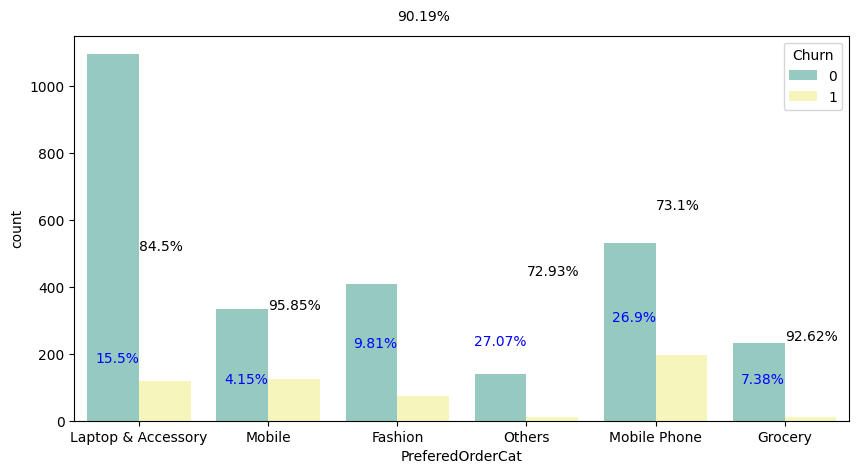

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PreferedOrderCat', hue='Churn', data=df, palette='Set3')
churn_counts = df[df['Churn'] == 1].groupby('PreferedOrderCat').size().reset_index(name='churn_count')
not_churn_counts = df[df['Churn'] == 0].groupby('PreferedOrderCat').size().reset_index(name='not_churn_count')

for i in range(6):
    category = churn_counts['PreferedOrderCat'][i]
    churn = churn_counts['churn_count'][i]
    not_churn = not_churn_counts['not_churn_count'][i]
    total = churn + not_churn
    percent_churn = (churn / total) * 100
    percent_not_churn = (not_churn / total) * 100
    plt.text(i, churn + 100, str(round(percent_churn, 2)) + '%', ha='right', color='blue')
    plt.text(i, not_churn + 100, str(round(percent_not_churn, 2)) + '%', ha='left', color='black')

plt.show()

Based on the categories of Preferred Order Category, there is a higher churn percentage more than 10% observed in Laptop & Accessory, Mobile Phone, and Others compared to other categories.

### MaritalStatus

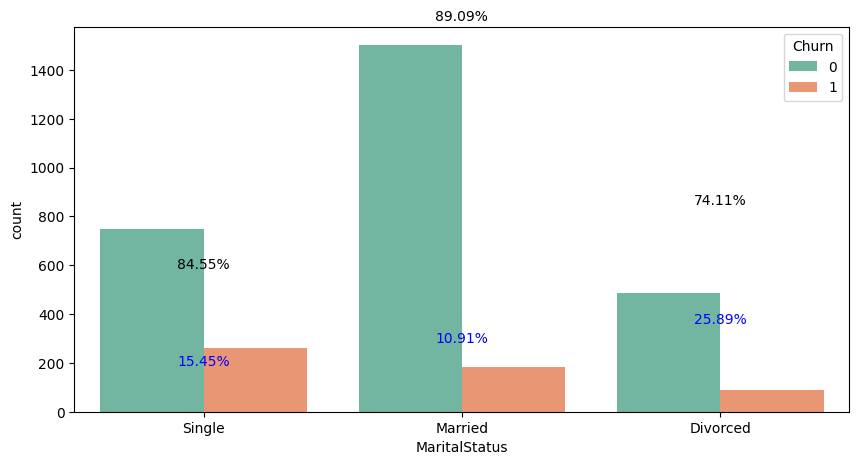

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='MaritalStatus', hue='Churn', data=df, palette='Set2')
churn_counts = df[df['Churn'] == 1].groupby('MaritalStatus').size().reset_index(name='churn_count')
not_churn_counts = df[df['Churn'] == 0].groupby('MaritalStatus').size().reset_index(name='not_churn_count')

for i in range(3):
    category = churn_counts['MaritalStatus'][i]
    churn = churn_counts['churn_count'][i]
    not_churn = not_churn_counts['not_churn_count'][i]
    total = churn + not_churn
    percent_churn = (churn / total) * 100
    percent_not_churn = (not_churn / total) * 100
    plt.text(i, churn + 100, str(round(percent_churn, 2)) + '%', ha='center', color='blue')
    plt.text(i, not_churn + 100, str(round(percent_not_churn, 2)) + '%', ha='center', color='black')

plt.show()

Based on the categories of Marital Status, the highest churn percentage is observed in the Divorced category.

# Feature Engineering

- 'Tenure'                      = Continuous numerical column didn't need to perform Scaling
- 'WarehouseToHome'             = Continuous numerical column didn't need to perform Scaling
- 'NumberOfDeviceRegistered'    = No need to perform Scaling and Encoding
- 'PreferedOrderCat'            = Need to perform Binary Encoding because the data contain categorical value with more than 5 categories
- 'SatisfactionScore'           = No need to perform Scaling and Encoding
- 'MaritalStatus'               = Need to perform One Hot Encoding because the data contain 3 categories of categorical value
- 'NumberOfAddress'             = Need to perform Binning into three different class with certain interval
- 'Complain'                    = No need to perform Encoding because the data already represent binary class
- 'DaySinceLastOrder'           = Need to perform Binning into Binary Class with Complain column as reference 
- 'CashbackAmount'              = No need to perform Scaling
- 'Churn'                       = No need to perform Encoding because the data already represent binary class

In [ ]:
df[numerical_cols].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,DaySinceLastOrder,CashbackAmount
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000
mean,10.132110,15.406728,3.676453,3.020795,4.222936,4.459939,177.417670
std,8.440368,8.404449,1.017390,1.395113,2.623195,3.609590,49.310647
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,2.000000,145.892500
50%,9.000000,13.000000,4.000000,3.000000,3.000000,3.000000,163.885000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,7.000000,197.137500
max,61.000000,127.000000,6.000000,5.000000,22.000000,46.000000,324.990000


## Pre-processing

### Binning 

In [ ]:
bin = []
for i in df['DaySinceLastOrder']:
    if i < 30:
        bin.append('1')
    else:
        bin.append('0')
df['DaySinceLastOrder'] = bin
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,1,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,1,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,1,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,1,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,1,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,7,0,1,249.90,0
3266,26.0,7.0,4,Grocery,1,Married,4,0,1,295.99,0
3267,28.0,9.0,5,Fashion,3,Married,8,0,1,231.86,0
3268,8.0,7.0,2,Mobile Phone,2,Single,4,0,1,157.80,0


Here, binning is performed on the "Day Since Last Order" column to separate customers who made a purchase within the last month and those who did not.

In [ ]:
bin = []
for i in df['NumberOfAddress']:
    if i <= 8:
        bin.append('1')
    elif 9 <= i < 16 :
        bin.append('2')
    else:
        bin.append('3')
df['NumberOfAddress'] = bin
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,1,0,1,143.32,0
1,7.0,25.0,4,Mobile,1,Married,1,0,1,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,1,0,1,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,1,0,1,230.27,0
4,30.0,15.0,4,Others,4,Single,1,0,1,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,1,0,1,249.90,0
3266,26.0,7.0,4,Grocery,1,Married,1,0,1,295.99,0
3267,28.0,9.0,5,Fashion,3,Married,1,0,1,231.86,0
3268,8.0,7.0,2,Mobile Phone,2,Single,1,0,1,157.80,0


The "Number Of Address" column is divided into 3 groups with equal intervals.

### Encoding

In [ ]:
import category_encoders

In [ ]:
# Transformer

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
    ('binary', category_encoders.BinaryEncoder(), ['PreferedOrderCat'])
], remainder='passthrough')

In [ ]:
dfTransformed = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
dfTransformed.head()

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,0.0,0.0,0,0,1,1.0,35.0,5,4,1,0,1,165.49
1,1.0,0.0,0,1,0,0.0,7.0,3,1,1,0,1,132.29
2,1.0,0.0,0,1,1,1.0,13.0,2,5,1,1,1,141.01
3,1.0,0.0,0,0,1,8.0,8.0,3,5,1,0,1,150.93
4,0.0,1.0,0,1,1,1.0,12.0,4,4,1,1,1,143.78


### Imbalance Treatment

<Axes: ylabel='Tenure'>

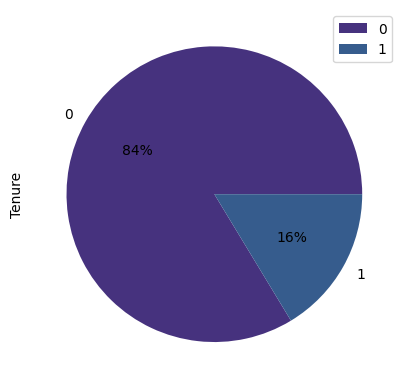

In [ ]:
# Imbalance Treatment

df.groupby(['Churn']).count().plot(
    kind='pie', y='Tenure', autopct='%1.0f%%')

In [ ]:
df['Churn'].mean()*100

16.3302752293578

16% of the positive class data, which represents the target in the dataset, has an imbalanced proportion.

### Data Splitting

In [ ]:
# Data Splitting
# Define X and y

X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               stratify = y,
                                               test_size = 0.2,
                                               random_state = 270799)

# Modelling

The following classification methods will be tested to determine the best model for this dataset: Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost, Adaboost, and Gradient Boosting.

### Cross Validation

Some considerations for this benchmark model include:

1. As mentioned in the data analysis, the dataset is imbalanced, requiring resampling techniques. The resampling method used is SMOTE, which involves adding data to the minority class.
2. Stratified K-Fold cross-validation will be performed to maintain the distribution of the target class (churn) during data splitting.
3. The metric used for evaluation is Recall, as the goal is to minimize False Negatives.
4. The hyperparameters are set to their default values, and all features will be utilized in the model.

In [ ]:
adaboost = AdaBoostClassifier(random_state = 270799)
gboost = GradientBoostingClassifier(random_state = 270799)
logreg = LogisticRegression() # There is no random_state = 270799 parameter in this algorithm
knn = KNeighborsClassifier() # There is no random_state = 270799 parameter in this algorithm
dt = DecisionTreeClassifier(random_state = 270799)
rf = RandomForestClassifier(random_state = 270799)
xgb = XGBClassifier(random_state = 270799)

models = [logreg,knn,dt,rf,xgb, adaboost, gboost]
score=[]
recall=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=10)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('sampler',SMOTE(random_state = 270799)),
        ('model',i),
        ])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    recall.append(model_cv.mean())
    std.append(model_cv.std())
    
kfold = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting'],
                      'mean recall':recall,
                      'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)
kfold

,mean recall,sdev
model,,
Logistic Regression,0.796124,0.068217
KNN,0.737652,0.051964
AdaBoost,0.662735,0.061268
Gradient Boosting,0.624972,0.058726
XGBoost,0.613068,0.065522
Decision Tree,0.585659,0.091050
Random Forest,0.571096,0.061661


### Testing the Data Test

In [ ]:
models = [logreg, knn, dt, rf, xgb, adaboost, gboost]
scorerecall = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('sampler', SMOTE(random_state = 270799)),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','AdaBoost', 'Gradient Boosting']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    scorerecall.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
testdata = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting'],
             'recall score':scorerecall}).set_index('model').sort_values(by='recall score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       547
           1       0.42      0.83      0.56       107

    accuracy                           0.79       654
   macro avg       0.69      0.80      0.71       654
weighted avg       0.87      0.79      0.81       654

KNN 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       547
           1       0.38      0.76      0.51       107

    accuracy                           0.76       654
   macro avg       0.66      0.76      0.68       654
weighted avg       0.85      0.76      0.79       654

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       547
           1       0.63      0.63      0.63       107

    accuracy                           0.88       654
   macro avg       0.78      0.78      0.78       654
weighted avg       0.88      0

In [ ]:
testdata

,recall score
model,
Random Forest,0.940559
XGBoost,0.932820
Gradient Boosting,0.923371
AdaBoost,0.902732
Logistic Regression,0.875942
KNN,0.828854
Decision Tree,0.776521


In [ ]:
diff = kfold.join(testdata)
diff['difference'] = abs(diff['mean recall'] - diff['recall score'])
diff

,mean recall,sdev,recall score,difference
model,,,,
Logistic Regression,0.796124,0.068217,0.875942,0.079818
KNN,0.737652,0.051964,0.828854,0.091202
AdaBoost,0.662735,0.061268,0.902732,0.239997
Gradient Boosting,0.624972,0.058726,0.923371,0.298399
XGBoost,0.613068,0.065522,0.932820,0.319752
Decision Tree,0.585659,0.091050,0.776521,0.190862
Random Forest,0.571096,0.061661,0.940559,0.369463


K-fold cross-validation is a technique used to evaluate model performance by dividing the training data into multiple parts and iteratively creating and validating the model on different subsets. This method provides an average performance measure for the model. On the other hand, test data is a separate dataset used solely to assess the model's performance on unseen data. K-fold cross-validation is particularly useful when training data is limited, while test data is advantageous when there is an adequate amount of training data. Therefore, for evaluating model performance, especially with limited training data, it is recommended to employ k-fold cross-validation.

There is a slight difference of 0.07 in the benchmarking performance of the Logistic Regression model between using K-fold cross-validation and the test data. Therefore, the author chose to use Logistic Regression as the base model.

These are some strengths and benefits in addressing the churn prediction problem using Logistic Regression as base model : 

1. Interpretability: Logistic regression models provide clear and interpretable coefficients, allowing you to understand the impact of each feature on the likelihood of churn. This can help you explain the factors contributing to churn to stakeholders.

2. Efficiency: Logistic regression models are computationally efficient and can handle large datasets with a relatively low training time. This makes them suitable for real-time or large-scale churn prediction applications.

3. Model Performance: Logistic regression models can perform well in situations where the relationship between the features and the target variable (churn) is approximately linear or can be approximated by a linear relationship. If your data exhibits such characteristics, the logistic regression model can provide reliable predictions.

4. Robustness: Logistic regression models are robust to outliers and can handle categorical or numerical features without the need for extensive feature engineering. This makes them flexible and applicable to various types of datasets.

5. Model Interpretation: Logistic regression models allow you to understand the impact and significance of each feature on the probability of churn. By examining the coefficients, you can identify the most influential factors contributing to churn and use them to guide decision-making and interventions.

# Hyperparameter Tuning

Hyperparameter tuning is important to control the overall behavior of a machine learning model. Hyperparameter tuning will be performed on the Logistic Regression model with the expectation of achieving a more optimal model. By fine-tuning the hyperparameters, we aim to improve the performance and accuracy of the Logistic Regression model, ultimately enhancing its predictive capabilities for the given dataset.

Grid search is a method used for hyperparameter tuning where a predefined set of hyperparameter values is explored to identify the optimal combination for a model. In logistic regression, examples of such hyperparameters include the regularization strength represented by the value of C, and the penalty type.

- The value of C serves as an inverse measure of regularization strength in the logistic regression model. Smaller C values correspond to stronger regularization, while larger values indicate weaker regularization. This parameter governs the balance between fitting the training data accurately and preventing overfitting.

- The penalty type determines the type of regularization applied in the logistic regression model, with two commonly used options: L1 and L2. L1 regularization induces sparsity in coefficients, resulting in only a few variables having non-zero coefficients. Conversely, L2 regularization produces smoother coefficients.

By utilizing grid search, we can systematically explore different combinations of hyperparameters. This entails evaluating the model's performance using each combination and selecting the one that yields the best results based on a chosen evaluation metric.

### Define Parameter of the Model

In [ ]:
hyperparam_space = {
    'model__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'model__penalty': ['l1', 'l2', 'elasticnet', None]
}

### Grid Search Cross Validation

In [ ]:
estimator=Pipeline([
        ('preprocess',transformer),
        ('sampler',SMOTE(random_state = 270799)),
        ('model',logreg),
        ])

grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skfold, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1, # use all cores
    verbose = 1
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('sampler', SMOTE(random_state=270799)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1,
                                      0.05, 0.01, 0.005, 0.001, 0.0005,
                                      0.0001],
                         'model__penalty': ['l1', 'l2', 'elasticnet', None],
                         'model__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                           'newton-cholesky', 'sag', 'saga']},
             scoring='recall', verbose=1)

### Display Best Score and Best Parameter

In [ ]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.8100221483942415
best param {'model__C': 0.05, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


### Display Results in Data Frame

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131261,0.022503,0.000000,0.000000,1000,l1,lbfgs,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
1,1.243653,0.375019,0.027122,0.006299,1000,l1,liblinear,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",0.744186,0.837209,...,0.837209,0.767442,0.860465,0.714286,0.833333,0.833333,0.697674,0.803212,0.064793,6
2,0.089266,0.008869,0.000000,0.000000,1000,l1,newton-cg,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
3,0.096458,0.009677,0.000000,0.000000,1000,l1,newton-cholesky,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
4,0.081821,0.007328,0.000000,0.000000,1000,l1,sag,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.093568,0.011367,0.000000,0.000000,0.0001,None,liblinear,"{'model__C': 0.0001, 'model__penalty': None, '...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196
356,0.736559,0.181224,0.037387,0.036507,0.0001,None,newton-cg,"{'model__C': 0.0001, 'model__penalty': None, '...",0.744186,0.837209,...,0.837209,0.767442,0.860465,0.714286,0.833333,0.809524,0.697674,0.800831,0.064076,45
357,0.124943,0.042652,0.030457,0.005410,0.0001,None,newton-cholesky,"{'model__C': 0.0001, 'model__penalty': None, '...",0.744186,0.837209,...,0.837209,0.767442,0.860465,0.714286,0.833333,0.809524,0.697674,0.800831,0.064076,45
358,0.423946,0.075771,0.027406,0.005391,0.0001,None,sag,"{'model__C': 0.0001, 'model__penalty': None, '...",0.767442,0.860465,...,0.883721,0.837209,0.767442,0.619048,0.785714,0.880952,0.720930,0.802990,0.084426,21


# Post Modelling

## Final Model Evaluation

### Before Hyperparameter Tuning

In [ ]:
beforetuning=Pipeline([
        ('preprocess',transformer),
        ('sampler', SMOTE(random_state = 270799)),
        ('model',logreg)])
beforetuning.fit(X_train,y_train)
y_pred = beforetuning.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       547
           1       0.42      0.83      0.56       107

    accuracy                           0.79       654
   macro avg       0.69      0.80      0.71       654
weighted avg       0.87      0.79      0.81       654



In [ ]:
print('Logistic Regression Model Before Hyperparameter Tuning')
print('recall value     ', recall_score(y_test, y_pred))
print('precision value  ', precision_score(y_test, y_pred))
print('f1 value         ', f1_score(y_test, y_pred))

Logistic Regression Model Before Hyperparameter Tuning
recall value      0.8317757009345794
precision value   0.4218009478672986
f1 value          0.559748427672956


### After Hyperparameter Tuning

In [ ]:
logreg2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.05)

In [ ]:
aftertuning=Pipeline([
        ('preprocess',transformer),
        ('sampler', SMOTE(random_state = 270799)),
        ('model',logreg2)])
    
aftertuning.fit(X_train,y_train)
y_pred_tuned = aftertuning.predict(x_test)
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       547
           1       0.42      0.83      0.55       107

    accuracy                           0.78       654
   macro avg       0.69      0.80      0.70       654
weighted avg       0.87      0.78      0.81       654



In [ ]:
print('Logistic Regression Model After Hyperparameter Tuning')
print('recall value     ', recall_score(y_test, y_pred_tuned))
print('precision value  ', precision_score(y_test, y_pred_tuned))
print('f1 value         ', f1_score(y_test, y_pred_tuned))

Logistic Regression Model After Hyperparameter Tuning
recall value      0.8317757009345794
precision value   0.4158878504672897
f1 value          0.5545171339563862


There is no significant difference in the prediction results between the model before tuning and after tuning. This could be due to the data size being too small to allow the model to achieve significant improvements. From the comparison of classification report of before using hyperparameter tuning and after using hyperparameter tuning of Logistic Regression Model, it didn't give significant effect to the model.

Based on the classification report findings, it can be inferred that our model demonstrates promising accuracy in predicting customer churn. With an accuracy of 83.1%, our model can effectively identify customers who are likely to churn. Additionally, it achieves an accuracy of 78% in predicting customers who are unlikely to churn in the near future. These results highlight the potential of our model to accurately target retention strategies and proactively address customer churn.

## Feature Importances

In [ ]:
# Assuming 'grid' is your GridSearchCV object and it's already fit
best_model = grid_search.best_estimator_

# Get feature names from the transformer
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()

# Get coefficients from the logistic regression model
coefs = best_model.named_steps['model'].coef_[0]

# Pair feature names with coefficients
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': coefs})

# Sort by the absolute values of the coefficients
feature_importances['abs_importance'] = feature_importances['importance'].abs()
feature_importances = feature_importances.sort_values(by='abs_importance', ascending=False)

# Drop the 'importance' column
#feature_importances = feature_importances.drop(columns='importance')

# Now the DataFrame 'feature_importances' no longer has the 'importance' column
pd.DataFrame(feature_importances)

,feature,importance,abs_importance
10,remainder__Complain,1.387766,1.387766
2,binary__PreferedOrderCat_0,0.980913,0.980913
9,remainder__NumberOfAddress,0.695454,0.695454
3,binary__PreferedOrderCat_1,0.569998,0.569998
11,remainder__DaySinceLastOrder,-0.490242,0.490242
0,onehot__MaritalStatus_Married,-0.459274,0.459274
1,onehot__MaritalStatus_Single,0.445664,0.445664
4,binary__PreferedOrderCat_2,-0.390654,0.390654
7,remainder__NumberOfDeviceRegistered,0.352871,0.352871
8,remainder__SatisfactionScore,0.193676,0.193676


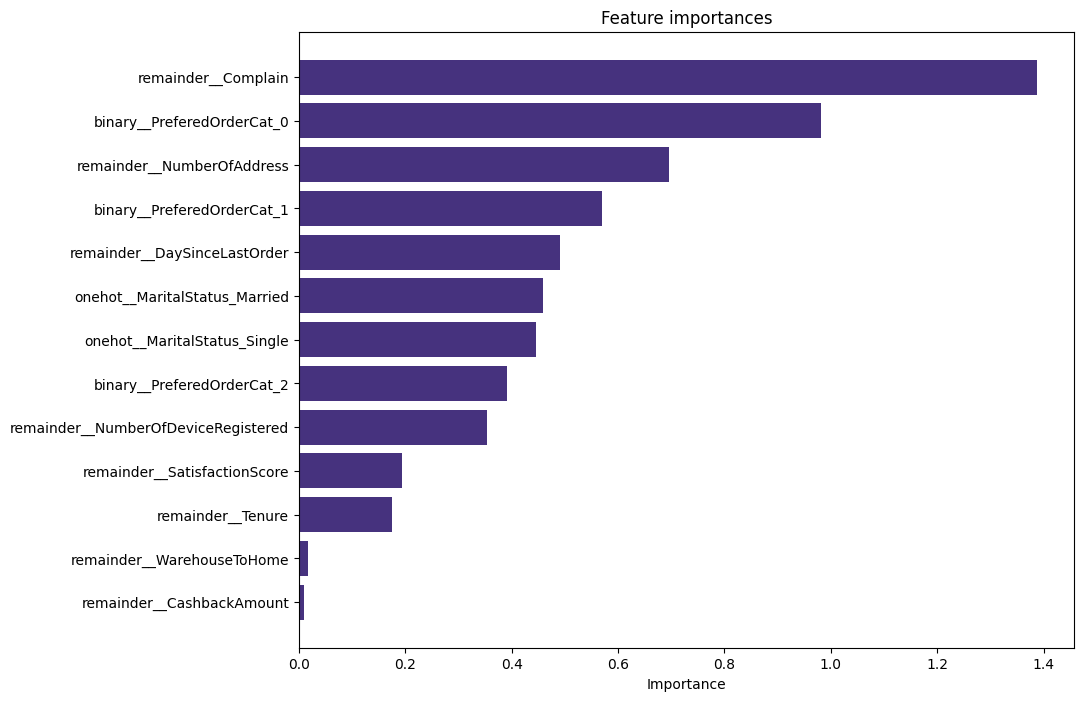

In [ ]:
# Considering the top 20 features
top_features = feature_importances[:20]

plt.figure(figsize=(10, 8))
plt.barh(top_features['feature'], top_features['abs_importance'], align='center')
plt.xlabel("Importance")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of the features
plt.show()

From the barplot above we can see what features are contributing the most to the target usinge machine learning model, it helps us to define what sector we need to recommend for improvement.<br>
The top three of feature importances are **Complain, PreferedOrderCat and NumberOfAddress**, which are great result for us to consider these feature in order to gather deeper analysis information for improvement recommendation.

## Confusion Matrix

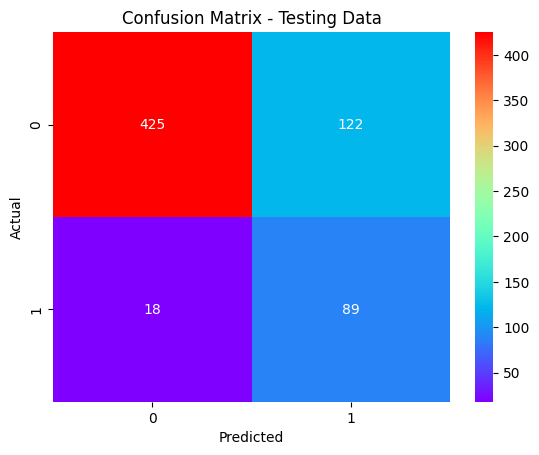

In [ ]:
# For testing data
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='rainbow')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [263]:
# Calculating False Negative Rate

FN = 18/(18+89)
print(f'False Negative Rate : {round(FN*100,2)}%')

False Negative Rate : 16.82%


## Implementation of Business

### Business Implementation

Based on the classification report findings, it can be inferred that our model demonstrates promising accuracy in predicting customer churn. With an accuracy of 83.1%, our model can effectively identify customers who are likely to churn. Additionally, it achieves an accuracy of 78% in predicting customers who are unlikely to churn in the near future. These results highlight the potential of our model to accurately target retention strategies and proactively address customer churn.

If the cost of retaining a customer is $70 and the cost of acquiring a new customer is $100, with a total of 500 customers, where 80 customers churn and 420 customers do not churn, the calculations are approximately as follows:

1. Without Model Used :
    - Total Cost Needed :  500 * $70 = $35,000
    - Churned customers found : 80 people
    - Churned customers not found : 0
    - Non-churned customers found : 420 people
    - Non-churned customers not found : 0
    - Wasted cost : 420 * $70 = $29,400

2. Implementation Using Model:
    - Total Cost : (80 * 0.78) * $70 = $4,368
    - Churned customers found : 80 * 0.78 = 62 people
    - Churned customers not found : (80-62) + (420 * 0.05) = 39 people
    - Non-churned customers found : 420 * 0.83 = 348 people
    - Non-churned customers not found : (420-348) = 72 people
    - Wasted cost : (39 * $70) + (23 * $100) = $2,730 + $23,000 = $25,730
    - Total savings :  $29,400 - $25,730 = $3,670

With the help of the model, the e-commerce company can save an amount of costs by implementing more targeted marketing strategies.Furthermore, based on the analysis, the influential factors for customer churn are complaints and customer tenure. It is crucial to pay attention to these factors, as customers who lodge complaints and have shorter tenure have a higher potential for churn.

# Conclusion & Recommendation

## Conclusion for Final Model

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       547
           1       0.42      0.83      0.56       107

    accuracy                           0.79       654
   macro avg       0.69      0.80      0.71       654
weighted avg       0.87      0.79      0.81       654



In [ ]:
print('Final Model Evaluation for Logistic Regression')
print('Recall value     ', recall_score(y_test, y_pred))
print('Precision value  ', precision_score(y_test, y_pred))

Final Model Evaluation for Logistic Regression
Recall value      0.8317757009345794
Precision value   0.4218009478672986


- Preprocessing data using endocer
- From the final model evaluation, the best model for e-commerce churn prediction will be Logistic Regression. 
- From the classification report, there are metrics that can be gained which are accuracy, recall, precision, and f-1 score. 
- Recall is used as metrics evaluation in this analysis and the recall value is **83.18%**
- False Negative rate is **16.82%**
- Top 3 features contributing are: **Complain, PreferedOrderCat and NumberOfAddress**

With the assistance of the model, e-commerce companies can significantly save costs by conducting more targeted marketing efforts.

## Recommendation

Here are some recommendations that can be provided regarding the business and model aspects:

Model:
1. Ensure the availability of a customer ID column during data retrieval to avoid duplicate or missing data.
2. Include additional columns with relevant features which directly relate to the e-commerce services and customer transactions.
3. Improve the model by fine-tuning the hyperparameters based on reference values or introducing additional parameters.
4. Enhance the recall metric with more algorithm/method of evaluation

Business:
1. Offer incentives such as promotions to encourage their loyalty.
2. Pay attention to customer feedback to improve the user experience.
3. Provide discounts on shipping costs for customers who are likely to churn and have a long distance between their residence and the warehouse.
4. Utilize the developed machine learning model to guide targeted marketing strategies effectively.

With the above recommendations, it is expected that the e-commerce company can reduce marketing costs and increase profitability by fostering customer loyalty.

# Thank You 